In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset from csv file
youtube_df=pd.read_csv(r"D:\Python files\Python Codes\Youtube Views prediction\Raw\youtube_train.csv",header=0)

print(youtube_df.shape)
youtube_df.tail(2)

(4533, 19)


,Video_id,publish_date,trending_date,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views
4531,PPD49TIn30,2018-03-04,2018-03-05,27,The Infographics Show,1607518.0,What Is Stone Man Syndrome?,stone man|stone man syndrome|fop|fibrodysplasi...,What is What Is Stone Man Syndrome? Can a pers...,7,15.0,2,,False,False,11795,10139,True,492313
4532,LOI64QVq10,2018-03-04,2018-03-05,117,UFC - Ultimate Fighting Championship,4381391.0,UFC 222: Brian Ortega Octagon Interview,ufc|222|brian|ortega|octagon|interview|joe|rog...,Hear from Brian Ortega inside of the Octagon a...,1,18.0,6,196618,True,False,12360,7695,True,1409175


In [3]:
#Checking missing values in the dataset
print(youtube_df.isnull().sum())
print(youtube_df.info())

Video_id                   0
publish_date               2
trending_date              2
category_id                7
channel_title              3
subscriber                31
title                      2
tags                     208
description               90
Trend_day_count            0
Tag_count                  1
Trend_tag_count            1
comment_count              0
comment_disabled           0
like dislike disabled      0
likes                      0
dislike                    0
tag appered in title       1
views                      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4533 entries, 0 to 4532
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Video_id               4533 non-null   object 
 1   publish_date           4531 non-null   object 
 2   trending_date          4531 non-null   object 
 3   category_id            4526 non-null   object 
 4   channel_titl

In [4]:
# Removing the features that we dont think are relevant to build the model
youtube_df=youtube_df.drop(['channel_title','title','tags','description'],axis=1)

In [5]:
# Cleaning invalid values and converting the variables from object into numeric/datetime values

In [6]:
youtube_df['category_id']=youtube_df['category_id'].replace("“24",24)
youtube_df['category_id']=pd.to_numeric(youtube_df['category_id'])

In [7]:
youtube_df['Trend_tag_count']=youtube_df['Trend_tag_count'].replace(">",np.nan)
youtube_df['Trend_tag_count']=youtube_df['Trend_tag_count'].astype(float)

In [8]:
youtube_df['comment_count']=youtube_df['comment_count'].replace(" ",np.nan)
youtube_df['comment_count']=youtube_df['comment_count'].astype(float)

In [9]:
youtube_df['publish_date']=pd.to_datetime(youtube_df['publish_date'])
youtube_df['trending_date']=pd.to_datetime(youtube_df['trending_date'])

#creating a feature to hold difference between publish date and trending date
youtube_df['Trend_start_day']=youtube_df['trending_date']-youtube_df['publish_date']

In [10]:
youtube_df['Trend_start_day']=youtube_df['Trend_start_day']/np.timedelta64(1, 'D')
youtube_df['Trend_start_day'].dtype

dtype('float64')

In [11]:
#Splitting date feature into 3 seperate features day, month and year
#we intend to check if any of these variables are statistcally significant to the dependent variable
youtube_df['publish_year']=youtube_df['publish_date'].dt.year
youtube_df['publish_month']=youtube_df['publish_date'].dt.month
youtube_df['publish_day']=youtube_df['publish_date'].dt.day

youtube_df['trending_year']=youtube_df['trending_date'].dt.year
youtube_df['trending_month']=youtube_df['trending_date'].dt.month
youtube_df['trending_day']=youtube_df['trending_date'].dt.day

youtube_df=youtube_df.drop(['publish_date','trending_date'],axis=1)

youtube_df.head(2)

,Video_id,category_id,subscriber,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Trend_start_day,publish_year,publish_month,publish_day,trending_year,trending_month,trending_day
0,HDR9SQc79,22.0,9086142.0,6,21.0,6.0,NaN,False,False,13342,6089,False,1978978,7.0,2017.0,11.0,13.0,2017.0,11.0,20.0
1,KNH52UF?48,24.0,5937292.0,1,23.0,1.0,116266.0,True,False,5761,3044,False,1487870,7.0,2017.0,11.0,13.0,2017.0,11.0,20.0


In [12]:
youtube_df['tag appered in title']=youtube_df['tag appered in title'].astype(bool)
youtube_df['tag appered in title'].unique()

array([False,  True])

In [13]:
youtube_df['views']=youtube_df['views'].replace("#VALUE!",np.nan)
print(youtube_df['views'].isnull().sum())

1


In [14]:
youtube_df['views']=youtube_df['views'].astype(float)

In [15]:
#To check which row has missing 'view' column
index=np.where(pd.isnull(youtube_df['views']))
youtube_df.iloc[index]

,Video_id,category_id,subscriber,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Trend_start_day,publish_year,publish_month,publish_day,trending_year,trending_month,trending_day
2421,WWW33ANN88,22.0,NaN,12,12.0,6.0,NaN,False,False,3690,3029,False,NaN,6.0,2018.0,1.0,6.0,2018.0,1.0,12.0


In [16]:
#To verify the updated datatypes for all features
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4533 entries, 0 to 4532
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Video_id               4533 non-null   object 
 1   category_id            4526 non-null   float64
 2   subscriber             4502 non-null   float64
 3   Trend_day_count        4533 non-null   int64  
 4   Tag_count              4532 non-null   float64
 5   Trend_tag_count        4531 non-null   float64
 6   comment_count          3084 non-null   float64
 7   comment_disabled       4533 non-null   bool   
 8   like dislike disabled  4533 non-null   bool   
 9   likes                  4533 non-null   int64  
 10  dislike                4533 non-null   int64  
 11  tag appered in title   4533 non-null   bool   
 12  views                  4532 non-null   float64
 13  Trend_start_day        4529 non-null   float64
 14  publish_year           4531 non-null   float64
 15  publ

In [17]:
youtube_df.isnull().sum()

Video_id                    0
category_id                 7
subscriber                 31
Trend_day_count             0
Tag_count                   1
Trend_tag_count             2
comment_count            1449
comment_disabled            0
like dislike disabled       0
likes                       0
dislike                     0
tag appered in title        0
views                       1
Trend_start_day             4
publish_year                2
publish_month               2
publish_day                 2
trending_year               2
trending_month              2
trending_day                2
dtype: int64

In [18]:
# %age of values missing in variables
youtube_df.isnull().mean().round(4)*100

Video_id                  0.00
category_id               0.15
subscriber                0.68
Trend_day_count           0.00
Tag_count                 0.02
Trend_tag_count           0.04
comment_count            31.97
comment_disabled          0.00
like dislike disabled     0.00
likes                     0.00
dislike                   0.00
tag appered in title      0.00
views                     0.02
Trend_start_day           0.09
publish_year              0.04
publish_month             0.04
publish_day               0.04
trending_year             0.04
trending_month            0.04
trending_day              0.04
dtype: float64

In [19]:
# 32% (1449) of comment count values are missing. Lets check if they are dependant on comment disabled
youtube_df['comment_count_null'] = np.where(youtube_df['comment_count'].isnull(), 1, 0)
youtube_df.groupby(['comment_disabled'])['comment_count_null'].sum()

comment_disabled
False    1449
True        0
Name: comment_count_null, dtype: int32

In [20]:
# This means all the 1449 missing comment_count are where comment_disabled= false
# So we can convert all missing values into 0
youtube_df['comment_count']=youtube_df['comment_count'].fillna(0)

In [21]:
# Dropping other missing values
youtube_df=youtube_df.dropna(subset=['Trend_start_day','category_id','subscriber','Tag_count','Trend_tag_count','tag appered in title','views'],axis=0)
youtube_df.shape

(4488, 21)

In [22]:
# Converting Video_id categorical variable into various numeric variables
cat_ids=pd.get_dummies(youtube_df['category_id'],prefix='cat_id',drop_first=True)
tag_appeared=pd.get_dummies(youtube_df['tag appered in title'],prefix='tag_in_title',drop_first=True)
comment_dis=pd.get_dummies(youtube_df['comment_disabled'],prefix='comment_disabled',drop_first=True)
like_dislike_dis=pd.get_dummies(youtube_df['like dislike disabled'],prefix='Likes_disabled',drop_first=True)

In [23]:
#To join new DF with existing DF use concat as the DF after get_dummies misses the indexes. 
youtube_df=pd.concat([youtube_df,cat_ids,tag_appeared,comment_dis,like_dislike_dis],axis=1)
pd.set_option('display.max_columns', None) # Shows all columns instead of showing '...' in between
youtube_df.head(2)

,Video_id,category_id,subscriber,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Trend_start_day,publish_year,publish_month,publish_day,trending_year,trending_month,trending_day,comment_count_null,cat_id_2.0,cat_id_10.0,cat_id_15.0,cat_id_17.0,cat_id_19.0,cat_id_20.0,cat_id_22.0,cat_id_23.0,cat_id_24.0,cat_id_25.0,cat_id_26.0,cat_id_27.0,cat_id_28.0,cat_id_29.0,cat_id_43.0,cat_id_117.0,cat_id_122.0,cat_id_210.0,cat_id_224.0,cat_id_226.0,cat_id_2225.0,tag_in_title_True,comment_disabled_True,Likes_disabled_True
0,HDR9SQc79,22.0,9086142.0,6,21.0,6.0,0.0,False,False,13342,6089,False,1978978.0,7.0,2017.0,11.0,13.0,2017.0,11.0,20.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,KNH52UF?48,24.0,5937292.0,1,23.0,1.0,116266.0,True,False,5761,3044,False,1487870.0,7.0,2017.0,11.0,13.0,2017.0,11.0,20.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [24]:
youtube_df.shape

(4488, 45)

In [25]:
# Dropping the variables for which dummies have been created
youtube_df=youtube_df.drop(['Video_id','category_id','tag appered in title','comment_disabled','like dislike disabled','comment_count_null'],axis=1)

In [26]:
youtube_df.isnull().sum()

subscriber               0
Trend_day_count          0
Tag_count                0
Trend_tag_count          0
comment_count            0
likes                    0
dislike                  0
views                    0
Trend_start_day          0
publish_year             0
publish_month            0
publish_day              0
trending_year            0
trending_month           0
trending_day             0
cat_id_2.0               0
cat_id_10.0              0
cat_id_15.0              0
cat_id_17.0              0
cat_id_19.0              0
cat_id_20.0              0
cat_id_22.0              0
cat_id_23.0              0
cat_id_24.0              0
cat_id_25.0              0
cat_id_26.0              0
cat_id_27.0              0
cat_id_28.0              0
cat_id_29.0              0
cat_id_43.0              0
cat_id_117.0             0
cat_id_122.0             0
cat_id_210.0             0
cat_id_224.0             0
cat_id_226.0             0
cat_id_2225.0            0
tag_in_title_True        0
c

In [27]:
#Finding Correlation
correlation_matrix = youtube_df.iloc[:,0:10].corr().round(2)
correlation_matrix

,subscriber,Trend_day_count,Tag_count,Trend_tag_count,comment_count,likes,dislike,views,Trend_start_day,publish_year
subscriber,1.00,-0.00,-0.00,-0.00,0.00,-0.01,-0.02,0.01,-0.02,-0.00
Trend_day_count,-0.00,1.00,-0.00,0.00,0.00,0.00,0.01,-0.00,-0.00,-0.01
Tag_count,-0.00,-0.00,1.00,0.00,0.00,-0.01,-0.03,-0.00,-0.00,-0.01
Trend_tag_count,-0.00,0.00,0.00,1.00,-0.02,-0.00,-0.01,-0.00,-0.00,-0.01
comment_count,0.00,0.00,0.00,-0.02,1.00,0.01,0.01,0.04,0.01,-0.01
likes,-0.01,0.00,-0.01,-0.00,0.01,1.00,0.34,-0.01,-0.01,-0.00
dislike,-0.02,0.01,-0.03,-0.01,0.01,0.34,1.00,-0.02,-0.02,0.02
views,0.01,-0.00,-0.00,-0.00,0.04,-0.01,-0.02,1.00,0.11,-0.09
Trend_start_day,-0.02,-0.00,-0.00,-0.00,0.01,-0.01,-0.02,0.11,1.00,-0.81
publish_year,-0.00,-0.01,-0.01,-0.01,-0.01,-0.00,0.02,-0.09,-0.81,1.00


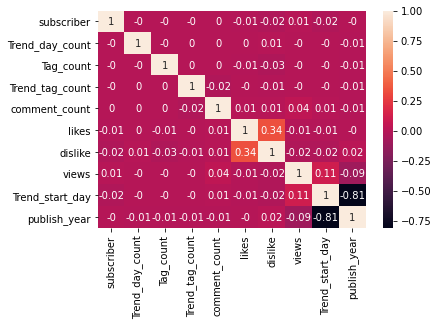

In [28]:
sns.heatmap(data=correlation_matrix, annot=True)

# Handling outliers

In [29]:
youtube_df.describe().round(2)

,subscriber,Trend_day_count,Tag_count,Trend_tag_count,comment_count,likes,dislike,views,Trend_start_day,publish_year,publish_month,publish_day,trending_year,trending_month,trending_day,cat_id_2.0,cat_id_10.0,cat_id_15.0,cat_id_17.0,cat_id_19.0,cat_id_20.0,cat_id_22.0,cat_id_23.0,cat_id_24.0,cat_id_25.0,cat_id_26.0,cat_id_27.0,cat_id_28.0,cat_id_29.0,cat_id_43.0,cat_id_117.0,cat_id_122.0,cat_id_210.0,cat_id_224.0,cat_id_226.0,cat_id_2225.0,tag_in_title_True,comment_disabled_True,Likes_disabled_True
count,4.488000e+03,4488.00,4488.00,4488.00,4488.00,4488.00,4488.00,4.488000e+03,4488.00,4488.00,4488.00,4488.00,4488.00,4488.00,4488.00,4488.00,4488.00,4488.00,4488.00,4488.00,4488.00,4488.00,4488.00,4488.00,4488.00,4488.00,4488.00,4488.00,4488.00,4488.00,4488.00,4488.00,4488.00,4488.00,4488.00,4488.00,4488.00,4488.00,4488.00
mean,3.569397e+06,7.55,17.97,6.22,111501.84,9799.25,5872.52,1.399831e+06,34.82,2017.44,6.30,15.61,2017.58,5.84,14.97,0.01,0.13,0.03,0.07,0.01,0.01,0.08,0.08,0.24,0.10,0.09,0.04,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.67,0.68,0.25
std,2.423717e+07,66.33,67.89,147.78,101347.39,19253.58,4829.13,1.734319e+07,249.11,0.84,5.03,8.38,0.49,4.97,8.70,0.12,0.33,0.16,0.25,0.10,0.11,0.26,0.28,0.43,0.29,0.29,0.19,0.24,0.05,0.02,0.02,0.01,0.01,0.01,0.01,0.01,0.47,0.47,0.44
min,0.000000e+00,0.00,0.00,1.00,0.00,0.00,0.00,1.000000e+00,0.00,2006.00,1.00,1.00,2017.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.428800e+05,4.00,12.00,2.00,0.00,0.00,0.00,4.274932e+05,5.00,2017.00,1.00,9.00,2017.00,1.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.186609e+06,7.00,17.00,4.00,98185.00,10420.50,5456.50,7.076345e+05,6.00,2018.00,3.00,15.00,2018.00,2.00,15.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00
75%,3.766915e+06,10.00,21.00,6.00,201786.25,15020.50,10155.75,1.175462e+06,7.00,2018.00,12.00,22.00,2018.00,12.00,22.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
max,1.576229e+09,4444.00,3225.00,9903.00,299877.00,1213628.00,14916.00,9.898735e+08,4215.00,2018.00,12.00,31.00,2018.00,12.00,31.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


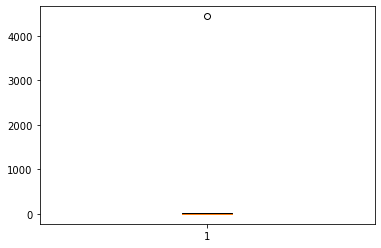

In [30]:
# Visualizing outliers
plt.boxplot(youtube_df["Trend_day_count"])
plt.show()

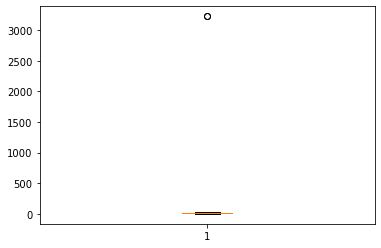

In [31]:
plt.boxplot(youtube_df["Tag_count"])
plt.show()

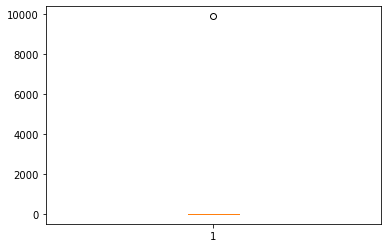

In [32]:
plt.boxplot(youtube_df["Trend_tag_count"])
plt.show()

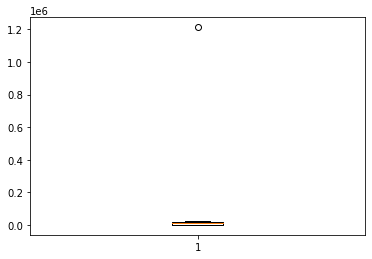

In [33]:
plt.boxplot(youtube_df["likes"])
plt.show()

In [34]:
youtube_df.quantile([0.25, 0.75], interpolation='midpoint')

,subscriber,Trend_day_count,Tag_count,Trend_tag_count,comment_count,likes,dislike,views,Trend_start_day,publish_year,publish_month,publish_day,trending_year,trending_month,trending_day,cat_id_2.0,cat_id_10.0,cat_id_15.0,cat_id_17.0,cat_id_19.0,cat_id_20.0,cat_id_22.0,cat_id_23.0,cat_id_24.0,cat_id_25.0,cat_id_26.0,cat_id_27.0,cat_id_28.0,cat_id_29.0,cat_id_43.0,cat_id_117.0,cat_id_122.0,cat_id_210.0,cat_id_224.0,cat_id_226.0,cat_id_2225.0,tag_in_title_True,comment_disabled_True,Likes_disabled_True
0.25,242880.0,4.0,12.0,2.0,0.0,0.0,0.0,427429.5,5.0,2017.0,1.0,9.0,2017.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.75,3766915.0,10.0,21.0,6.0,201818.5,15027.0,10156.5,1176092.0,7.0,2018.0,12.0,22.0,2018.0,12.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [35]:
#Creating lowerbound and upperboud values as threshold for removing outliers.
#We will be dropping all the values that fall out of this threshold.
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn,[25,75])
    IQR = Q3 - Q1
    low_range = Q1 - (1.5 * IQR)
    up_range = Q3 +(1.5 * IQR)
    return low_range,up_range

In [36]:
lowbd,upbd =outlier_treatment(youtube_df.subscriber)
youtube_df.drop(youtube_df[(youtube_df.subscriber > upbd)|(youtube_df.subscriber < lowbd)].index,inplace=True)

In [37]:
lowbd,upbd =outlier_treatment(youtube_df.Trend_day_count)
youtube_df.drop(youtube_df[(youtube_df.Trend_day_count > upbd)|(youtube_df.Trend_day_count < lowbd)].index,inplace=True)

In [38]:
lowbd,upbd =outlier_treatment(youtube_df.Tag_count)
youtube_df.drop(youtube_df[(youtube_df.Tag_count > upbd)|(youtube_df.Tag_count < lowbd)].index,inplace=True)

In [39]:
lowbd,upbd =outlier_treatment(youtube_df.Trend_tag_count)
youtube_df.drop(youtube_df[(youtube_df.Trend_tag_count > upbd)|(youtube_df.Trend_tag_count < lowbd)].index,inplace=True)

In [40]:
lowbd,upbd =outlier_treatment(youtube_df.likes)
youtube_df.drop(youtube_df[(youtube_df.likes > upbd)|(youtube_df.likes < lowbd)].index,inplace=True)

In [41]:
lowbd,upbd =outlier_treatment(youtube_df.views)
youtube_df.drop(youtube_df[(youtube_df.views > upbd)|(youtube_df.views < lowbd)].index,inplace=True)

In [42]:
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 1 to 4532
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   subscriber             3850 non-null   float64
 1   Trend_day_count        3850 non-null   int64  
 2   Tag_count              3850 non-null   float64
 3   Trend_tag_count        3850 non-null   float64
 4   comment_count          3850 non-null   float64
 5   likes                  3850 non-null   int64  
 6   dislike                3850 non-null   int64  
 7   views                  3850 non-null   float64
 8   Trend_start_day        3850 non-null   float64
 9   publish_year           3850 non-null   float64
 10  publish_month          3850 non-null   float64
 11  publish_day            3850 non-null   float64
 12  trending_year          3850 non-null   float64
 13  trending_month         3850 non-null   float64
 14  trending_day           3850 non-null   float64
 15  cat_

In [43]:
#splitting data into X and Y
x=youtube_df.drop(['views'],axis=1)
y=youtube_df['views']

In [44]:
print(x.shape)
print(y.shape)

(3850, 38)
(3850,)


In [45]:
#Train test split for cross validation
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.25,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2887, 38)
(963, 38)
(2887,)
(963,)


# Decision tree

In [46]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor

# create a regressor object 
regressor = DecisionTreeRegressor(criterion='mse', random_state = 10)  

# fit the regressor with X and Y data 
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=10)

In [47]:
Y_predict=regressor.predict(X_test)

In [48]:
from sklearn import metrics

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_predict)))
print('R sqaure',metrics.r2_score(Y_test,Y_predict))

Root Mean Squared Error: 119132.41183618562
R sqaure 0.9107662930349365


# Random Forest

In [49]:
# import the regressor 
from sklearn.ensemble import RandomForestRegressor

# create a regressor object 
regressor = RandomForestRegressor(n_estimators=25, random_state=10)

# fit the regressor with X and Y data 
regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=25, random_state=10)

In [50]:
Y_predict = regressor.predict(X_test)

In [51]:
from sklearn import metrics

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_predict)))
print('R sqaure',metrics.r2_score(Y_test,Y_predict))

Root Mean Squared Error: 70778.31747854031
R sqaure 0.9685029749685634


# Gradient Boosting

In [52]:
from sklearn import datasets, ensemble
reg = ensemble.GradientBoostingRegressor()
reg.fit(X_train, Y_train)

GradientBoostingRegressor()

In [53]:
Y_predict = reg.predict(X_test)

In [54]:
print('R Squared:',metrics.r2_score(Y_test,Y_predict))
print('Mean Abs Error:',metrics.mean_absolute_error(Y_test,Y_predict))
print('Mean Sqr Error:',metrics.mean_squared_error(Y_test,Y_predict))
print('Root Mean Sqr Error:',np.sqrt(metrics.mean_squared_error(Y_test,Y_predict)))

R Squared: 0.9770940374156337
Mean Abs Error: 33405.66366468045
Mean Sqr Error: 3643170363.7155547
Root Mean Sqr Error: 60358.68093087816
